In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

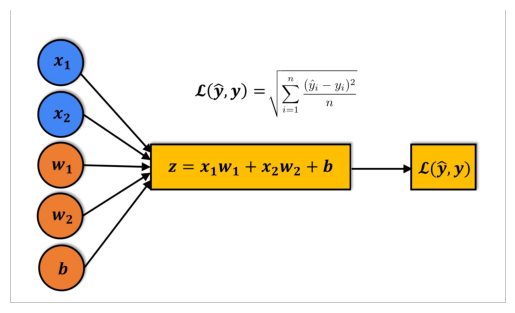

In [2]:
import matplotlib.pyplot as plt
image = plt.imread('01.png')
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

In [3]:
df = pd.read_csv("Assignment-2_Data.csv")

In [4]:
df

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# DataSet Shape
df.shape

(45211, 18)

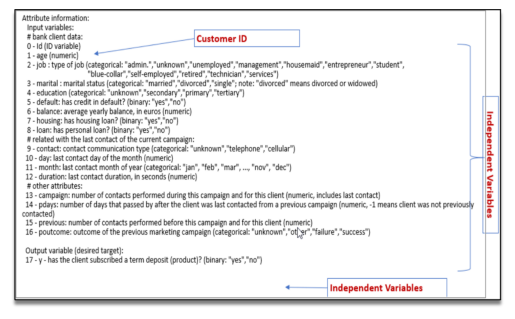

In [6]:
import matplotlib.pyplot as plt
image = plt.imread('datasetinfo.png')
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

In [7]:
#Basis Information of the Dataset
df.info()

# it shows we have age and balance have missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [8]:
# let's handle Missing values
numeric_cols =list(df.select_dtypes(include=['number']).columns)
categorical_cols = list(df.select_dtypes(exclude=['number']).columns)

numeric_impute =SimpleImputer(missing_values=np.nan,strategy='mean')
categorical_impute =SimpleImputer(strategy='most_frequent')

df[numeric_cols] =numeric_impute.fit_transform(df[numeric_cols])
df[categorical_cols] =categorical_impute.fit_transform(df[categorical_cols])


In [9]:
# check any null values are available

df.isna().sum()

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,45211.0,23606.000000,13051.435847,1001.0,12303.5,23606.0,34908.5,46211.0
age,45211.0,40.954714,11.537995,-1.0,33.0,39.0,48.0,999.0
balance,45211.0,1362.346620,3044.751361,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [11]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()
for col in categorical_cols :
    df[col]=lb.fit_transform(df[col])

Text(220.72222222222223, 0.5, 'Features')

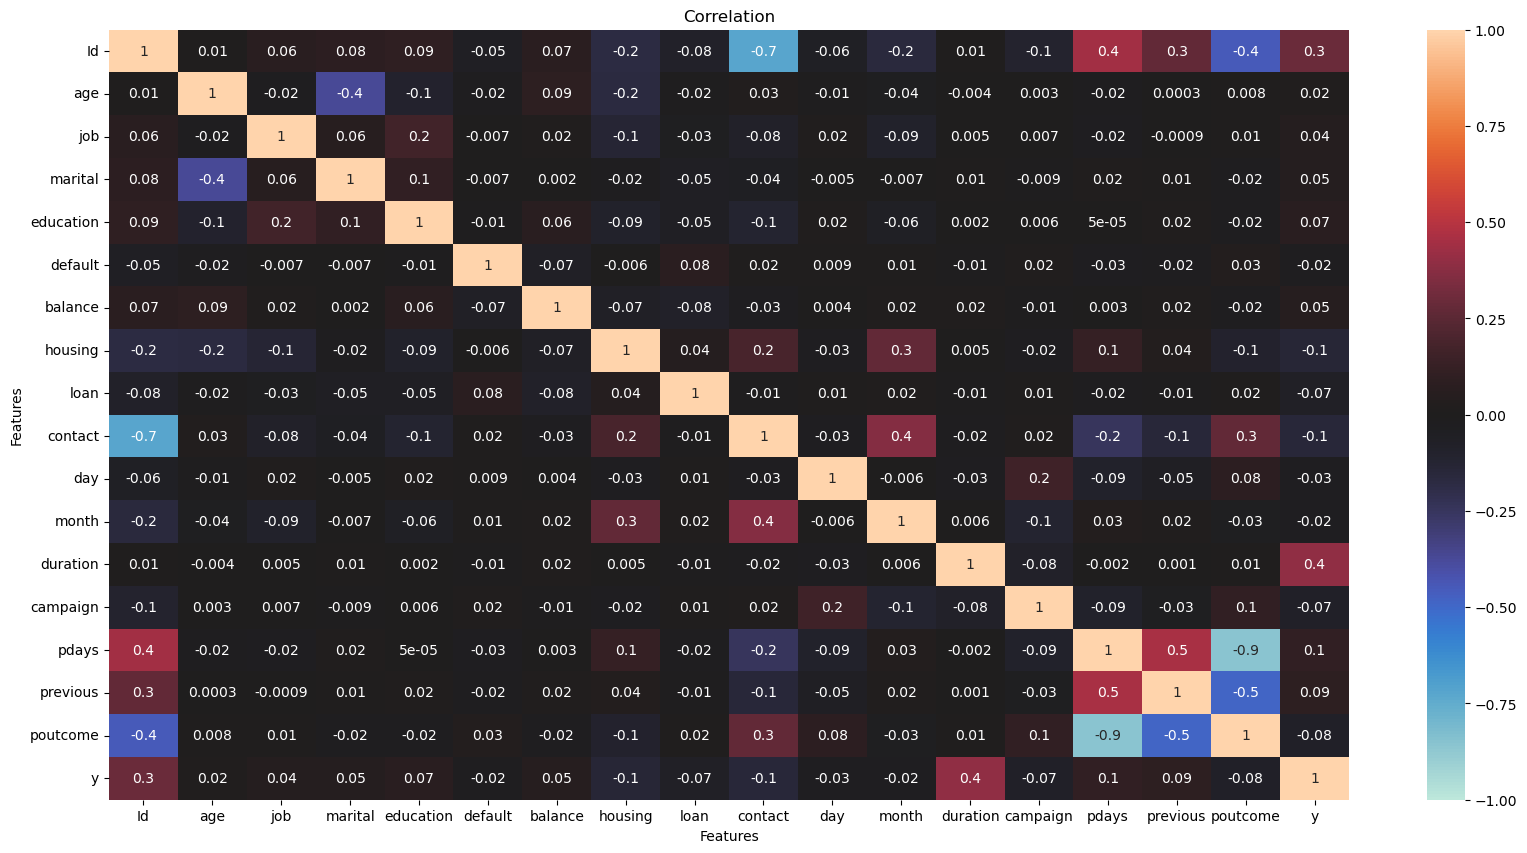

In [12]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.heatmap(df.corr(), annot = True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)
plt.title("Correlation", y=1)
plt.xlabel("Features")
plt.ylabel("Features")

In [13]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
df[numeric_cols]= sc.fit_transform(df[numeric_cols])

In [14]:
df.drop(columns=['Id','age','marital'],axis=1,inplace=True)

## Model Training and Evaluation

In [15]:
X= df.drop(columns=["y"])
Y =df["y"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.20)

print(f"The Shape of X_train: {X_train.shape}")
print(f"The Shape of X_test: {X_test.shape}")
print(f"The Shape of Y_train: {Y_train.shape}")
print(f"The Shape of Y_test: {Y_test.shape}")

The Shape of X_train: (36168, 14)
The Shape of X_test: (9043, 14)
The Shape of Y_train: (36168,)
The Shape of Y_test: (9043,)


In [16]:
model =LogisticRegression()
LR =model.fit(X_train,Y_train)

In [17]:
LR.coef_

array([[ 0.01021634,  0.1812007 , -0.41394224,  0.05531781, -1.07918077,
        -0.68880673, -0.65391748, -0.04158369,  0.03737383,  1.01762239,
        -0.39438217,  0.35256061,  0.20467442,  0.20820814]])

In [18]:
y_predict =model.predict(X_test)

In [19]:
#accuracy
accuracy =accuracy_score(y_predict,Y_test)
accuracy

0.8869844078292602

In [20]:
y_training_predict = model.predict(X_train)
accuracy_training = accuracy_score(y_training_predict,Y_train)
accuracy_training

0.8921975226719753

In [21]:
accuracy=accuracy_score(Y_test,y_predict)
print(f"The Accuracy Score on Testing Dataset :{accuracy}")
precision=precision_score(Y_test,y_predict)
recall =recall_score(Y_test,y_predict)
f1_score=f1_score(Y_test,y_predict)
print(f"The Precision Score on Testing Dataset :{precision}")
print(f"The recall Score on Testing Dataset :{recall}")
print(f"The f1 Score on Testing Dataset :{f1_score}")


The Accuracy Score on Testing Dataset :0.8869844078292602
The Precision Score on Testing Dataset :0.5869017632241813
The recall Score on Testing Dataset :0.21356553620531624
The f1 Score on Testing Dataset :0.3131720430107527


In [22]:
y_predict_proba =model.predict_proba(X_test)
y_predict_proba

array([[0.98344487, 0.01655513],
       [0.97028713, 0.02971287],
       [0.93756752, 0.06243248],
       ...,
       [0.98369372, 0.01630628],
       [0.99324024, 0.00675976],
       [0.96138311, 0.03861689]])

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
con_mat=confusion_matrix(Y_test,y_predict)

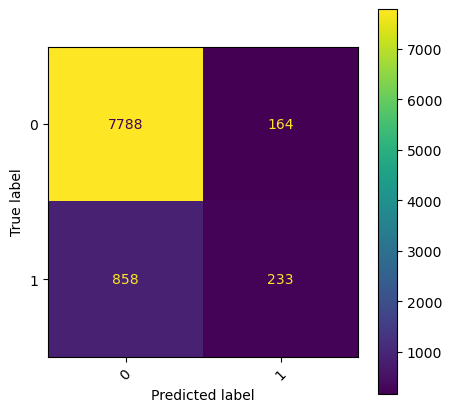

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

## CROSS VALIDATION

#### Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set.

#### The main purpose of cross validation is to prevent overfitting, which occurs when a model is trained too well on the training data and performs poorly on new, unseen data.

### Types of Cross-Validation

#### 1)  Holdout Validation

##### In Holdout Validation, we perform training on the 50% of the given dataset and rest 50% is used for the testing purpose. It’s a simple and quick way to evaluate a model. The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e. higher bias.

#### 2)   LOOCV (Leave One Out Cross Validation)

##### In this method, we perform training on the whole dataset but leaves only one data-point of the available dataset and then iterates for each data-point. In LOOCV, the model is trained on n-1    samples and tested on the one omitted sample, repeating this process for each data point in the dataset. The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point.

#### 3)   Stratified Cross-Validation

##### It is a technique used in machine learning to ensure that each fold of the cross-validation process maintains the same class distribution as the entire dataset.

##### a) The dataset is divided into k folds while maintaining the proportion of classes in each fold.                                                                        b) During each iteration, one-fold is used for testing, and the remaining folds are used for training.                                                                          c) The process is repeated k times, with each fold serving as the test set exactly once.


#### 4)   K-Fold Cross Validation

##### In K-Fold Cross Validation, we split the dataset into k number of subsets (known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.


In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

k = 10
cv = StratifiedKFold(n_splits=k, shuffle = True)

# Build multiple linear regression model
model = LogisticRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, Y, 
                         cv=cv, n_jobs=-1)  # n_jobs = -1 means using all processors
scores
print(f'Mean Accuracy: {scores.mean()}')


Mean Accuracy: 0.8910442995345031
